<a href="https://colab.research.google.com/github/sabumjung/Machine-Learning-Algorithm/blob/master/ch08_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 보팅 분류기

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [0]:
# For reproducibility
np.random.seed(1000)

nb_samples = 500

In [0]:
def compute_accuracies(lr, dt, svc, vc, X, Y):
    accuracies = []

    accuracies.append(cross_val_score(lr, X, Y, scoring='accuracy', cv=10).mean())
    accuracies.append(cross_val_score(dt, X, Y, scoring='accuracy', cv=10).mean())
    accuracies.append(cross_val_score(svc, X, Y, scoring='accuracy', cv=10).mean())
    accuracies.append(cross_val_score(vc, X, Y, scoring='accuracy', cv=10).mean())

    print('Accuracies:')
    print(np.array(accuracies))

    return accuracies


def plot_accuracies(accuracies):
    fig, ax = plt.subplots(figsize=(12, 8))
    positions = np.array([0, 1, 2, 3])

    ax.bar(positions, accuracies, 0.5)
    ax.set_ylabel('Accuracy')
    ax.set_xticklabels(('Logistic Regression', 'Decision Tree', 'SVM', 'Ensemble'))
    ax.set_xticks(positions + (5.0 / 20))
    plt.ylim([0.80, 0.93])
    plt.show()

In [0]:
# Create the dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_redundant=0, n_classes=2)

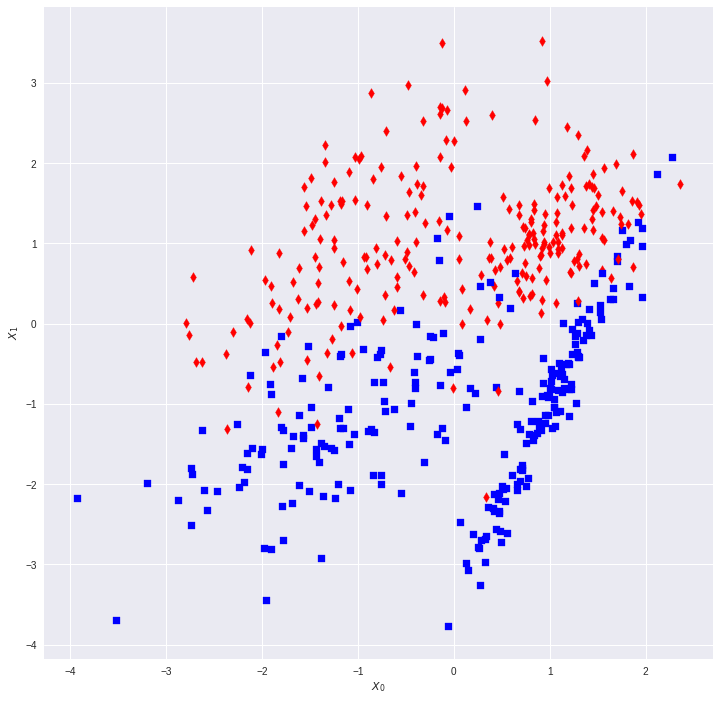

In [23]:
# Show the dataset
fig, ax = plt.subplots(figsize=(12, 12))

for i, x in enumerate(X):
    if Y[i] == 0:
        ax.scatter(x[0], x[1], marker='s', color='blue')
    else:
        ax.scatter(x[0], x[1], marker='d', color='red')

ax.set_xlabel(r'$X_0$')
ax.set_ylabel(r'$X_1$')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Accuracies:
[0.90182873 0.86186955 0.87386955 0.90182873]


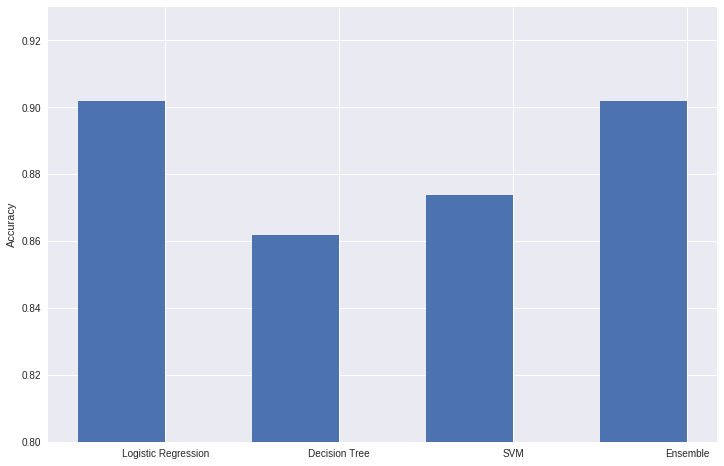

In [25]:
# Create the classifiers
lr = LogisticRegression()
svc = SVC(kernel='poly', probability=True)
dt = DecisionTreeClassifier()

classifiers = [('lr', lr),
               ('dt', dt),
               ('svc', svc)]

# Hard voting
vc = VotingClassifier(estimators=classifiers, voting='hard')

# Compute and plot accuracies
hard_accuracies = compute_accuracies(lr, dt, svc, vc, X, Y)
plot_accuracies(hard_accuracies)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Accuracies:
[0.90182873 0.85790876 0.87386955 0.89778952]


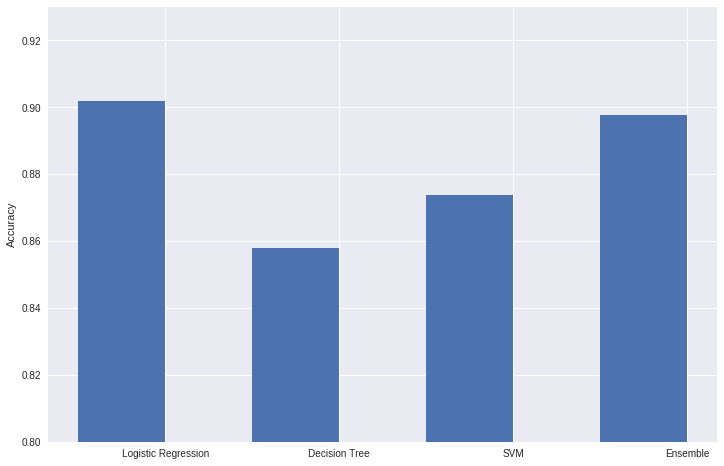

In [26]:
# Soft weighted voting
weights = [1.5, 0.5, 0.75]

vc = VotingClassifier(estimators=classifiers, weights=weights, voting='soft')

# Compute and plot accuracies
soft_accuracies = compute_accuracies(lr, dt, svc, vc, X, Y)
plot_accuracies(soft_accuracies)